# 12-2. Boston 주택 가격 예측 모델

## 데이터 로드 및 전처리

### 먼저 데이터를 불러와 확인해 보고 전처리를 해 봅시다.

### 데이터셋은 keras.datasets에서 불러올 수 있는 boston_housing 데이터셋을 활용합니다.

In [1]:
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [2]:
# keras.datasets 안에 boston_housing 데이터셋을 로드합니다.
from keras.datasets import boston_housing
from sklearn.model_selection import train_test_split

(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()
x_train, x_val, y_train, y_val = train_test_split(train_data, train_labels,
                                                  test_size=0.3,
                                                  random_state=123)
# 데이터셋의 크기를 확인합니다.
print(len(train_data))
print(len(test_data))

65536/57026 [==================================] - 0s 0us/step
404
102


### 데이터셋의 전처리를 위해 표준화 작업을 수행해야 합니다. 아래의 주석을 보고 코드를 작성해 보세요.

In [3]:
# 문제 1-1: 데이터셋의 전처리를 위해 표준화 작업을 수행합니다.
# 먼저 입력 데이터의 각 특성의 평균을 뺍니다.
mean = train_data.mean(axis=0)
train_data = train_data - mean

# 평균을 뺀 입력 데이터에서 표준편차를 나눕니다.
# 데이터 특성의 중앙이 0에 가깝게 만들고, 표준편차가 1이 되게 만듭니다.
std = train_data.std(axis=0)
train_data = train_data / std

# 테스트 데이터셋도 마찬가지로 평균을 빼고, 표준편차로 나눕니다.
test_data = test_data  -mean
test_data = test_data / std

## 모델 구성 및 컴파일

### 주택 가격 예측을 위한 딥러닝 모델을 구성하고 컴파일합니다. Sequential() 함수를 이용한 Sequential API 방법으로 딥러닝 모델을 구성해 보세요.

In [7]:
# 문제 1-2: 주택 가격 예측을 위한 딥러닝 모델 구성 및 컴파일합니다.
# input_shape은 (train_data.shape[1], )으로 구성합니다.
# 회귀(예측)을 위한 모델이므로 loss를 mse, metrics를 mae로 사용합니다.

from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Input(shape=(train_data.shape[1], )))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='sigmoid'))
model.add(layers.Dense(1, activation='softmax'))
model.summary()

model.compile(loss='mse',
              optimizer='SGD',
              metrics=['mae'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                896       
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


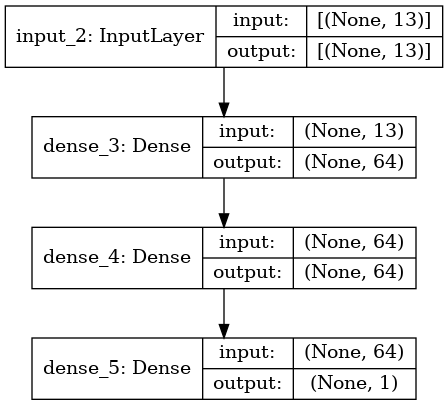

In [8]:
from tensorflow.keras import utils

utils.plot_model(model, show_shapes=True)

## 모델 학습

### epochs와 batch size는 자유롭게 설정해 보세요. 모델 학습 후에는 모델 학습 결과를 시각화해 보세요.

In [13]:
# 문제 1-3: 예측을 위한 딥러닝 모델을 학습합니다.
history1 = model.fit(train_data, train_labels,
                    epochs=200,
                    batch_size=64,
                    validation_data=(x_val, y_val))

Epoch 1/200
7/7 [==============================] - 0s 11ms/step - loss: 542.3704 - mae: 21.3950 - val_loss: 571.3256 - val_mae: 22.0598
Epoch 2/200
7/7 [==============================] - 0s 6ms/step - loss: 542.3704 - mae: 21.3950 - val_loss: 571.3256 - val_mae: 22.0598
Epoch 3/200
7/7 [==============================] - 0s 5ms/step - loss: 542.3704 - mae: 21.3950 - val_loss: 571.3256 - val_mae: 22.0598
Epoch 4/200
7/7 [==============================] - 0s 5ms/step - loss: 542.3704 - mae: 21.3950 - val_loss: 571.3256 - val_mae: 22.0598
Epoch 5/200
7/7 [==============================] - 0s 5ms/step - loss: 542.3704 - mae: 21.3950 - val_loss: 571.3256 - val_mae: 22.0598
Epoch 6/200
7/7 [==============================] - 0s 5ms/step - loss: 542.3704 - mae: 21.3950 - val_loss: 571.3256 - val_mae: 22.0598
Epoch 7/200
7/7 [==============================] - 0s 5ms/step - loss: 542.3704 - mae: 21.3951 - val_loss: 571.3256 - val_mae: 22.0598
Epoch 8/200
7/7 [==============================] - 0s 

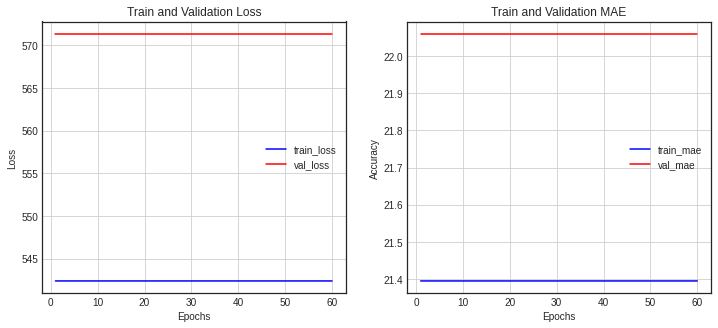

In [14]:
# 모델 학습 히스토리에서 loss, val_loss, mae, val_mae를 차트로 보여줍니다.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

mae = history_dict['mae']
val_mae = history_dict['val_mae']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, mae, 'b-', label='train_mae')
ax2.plot(epochs, val_mae, 'r-', label='val_mae')
ax2.set_title('Train and Validation MAE')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

## 모델 평가 및 예측

### 테스트 데이터를 가져와 모델 성능을 평가해 보겠습니다.

In [15]:
# 문제 1-4: 테스트 데이터셋을 이용해 모델을 평가합니다.
model.evaluate(test_data, test_labels)

4/4 [==============================] - 0s 2ms/step - loss: 570.7010 - mae: 22.0784


[570.7009887695312, 22.078432083129883]

# 12-3. Reuters 딥러닝 모델

### 이번 스텝에서는 8번 노드에 나왔던 모델과 동일한 모델을 실습합니다. 하지만 다양한 성능 향상 방법을 사용하여 8번 노드에서의 딥러닝 모델보다 성능을 더 높일 수 있습니다. 8번 노드에서 사용했던 ReLU와는 다른 활성화함수를 사용해보고, BatchNormalization과 Dropout을 적용해 봅시다. ModelCheckpoint와 EarlyStopping 콜백 함수도 적용해 보세요.

## 데이터 로드 및 전처리

### reuters 데이터셋을 로드하고, 훈련 데이터셋에서 25%를 검증 데이터셋으로 분리합니다. 데이터셋은 keras.datasets에서 불러올 수 있는 reuters 데이터 셋을 활용하고, 이때 파라메터 조정을 통해 단어의 개수는 10000개로 제한합니다(num_words=10000).

### 데이터셋 분리 작업에서는 sklearn 라이브러리의 train_test_split 함수를 활용합니다.

### 훈련, 검증, 테스트 데이터와 레이블 종류가 몇개인지 출력합니다.

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras import callbacks
from tensorflow.keras import utils
from keras.datasets import reuters

In [17]:
# 문제 2-1: reuters 데이터셋을 로드하고, 훈련 데이터셋에서 25%를 검증 데이터셋으로 분리합니다.
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)
x_train, val_data, y_train, y_val = train_test_split(train_data, train_labels,
                                                  test_size=0.25,
                                                  random_state=123)

# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇 개인지 출력합니다.
print(len(train_data))
print(len(val_data))
print(len(test_data))
print(len(y_val))
print(len(set(train_labels)))

8982
2246
2246
2246
46


### 텍스트 데이터의 전처리를 위해서 각 데이터셋마다 원-핫 인코딩을 수행합니다. 원-핫 인코딩 함수를 직접 만들어보세요.

### 레이블 데이터들은 범주형 형태로 to_categorical() 함수를 사용해 변환합니다.

In [18]:
# 문제 2-2: 텍스트 데이터의 전처리를 위해서 각 데이터셋마다 원-핫 인코딩을 수행합니다.
def one_hot_encoding(data, dim=10000):
  results = np.zeros((len(data), dim))
  for i, d in enumerate(data):
    results[i, d] = 1.
  return results

x_train = one_hot_encoding(train_data)
x_val = one_hot_encoding(val_data)
x_test = one_hot_encoding(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

# 레이블 데이터들은 범주형 형태로 to_categorical() 함수를 사용해 변환합니다.
y_train = utils.to_categorical(train_labels)
y_test = utils.to_categorical(test_labels)

print(train_labels[5], y_train[5])
print(train_labels[15], y_train[15])
print(train_labels[25], y_train[25])

4 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
8 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


## 모델 구성 및 컴파일

### BatchNormalization과 Dropout을 적용하여 빠르게 학습하면서 과대적합을 방지하고, 46개의 뉴스 주제를 분류하는 딥러닝 모델을 구성합니다.

In [19]:
# 문제 2-3: 빠른 학습과 과대적합을 방지하기 위해 BatchNormalization과 Dropout을 적용한 딥러닝 모델을 구성합니다.
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(10000, ), name='input'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Activation('relu')) 
model.add(layers.Dense(128, activation='sigmoid', name='dense_hidden'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Activation('sigmoid')) 
model.add(layers.Dense(46, activation='softmax', name='output'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

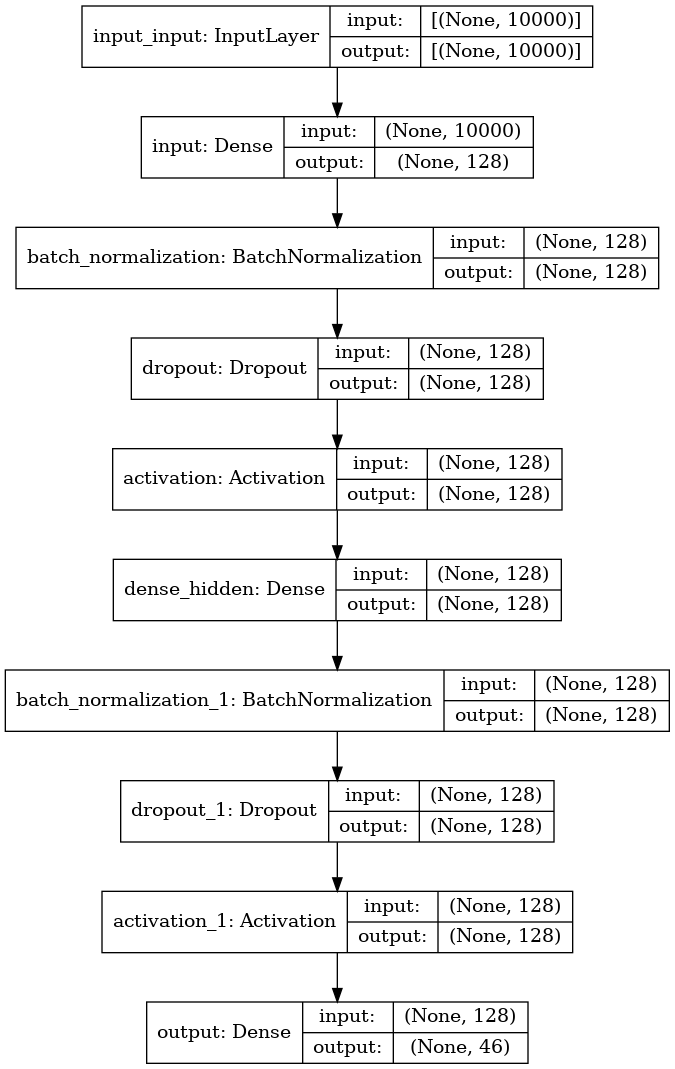

In [20]:
utils.plot_model(model, show_shapes=True)

In [21]:
model.summary()


print(len(x_train))
print(len(y_train))

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (Dense)                (None, 128)               1280128   
_________________________________________________________________
batch_normalization (BatchNo (None, 128)               512       
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
activation (Activation)      (None, 128)               0         
_________________________________________________________________
dense_hidden (Dense)         (None, 128)               16512     
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512       
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)              

## 모델 학습

### ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.

In [22]:
# 문제 2-4: ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.


check_point_cb = callbacks.ModelCheckpoint('Reuters_model.h5', 
                                           save_best_only=True)
early_stopping_cb = callbacks.EarlyStopping(patience=10, 
                                            monitor='val_loss',
                                            restore_best_weights=True)

history2 = model.fit(x_train, y_train, 
                    epochs=40,
                    batch_size=512,
                    validation_data=(x_test, y_test),
                    callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/40
18/18 [==============================] - 2s 39ms/step - loss: 0.4560 - accuracy: 0.1168 - val_loss: 0.2347 - val_accuracy: 0.0036
Epoch 2/40
18/18 [==============================] - 0s 15ms/step - loss: 0.2050 - accuracy: 0.4811 - val_loss: 0.1253 - val_accuracy: 0.3646
Epoch 3/40
18/18 [==============================] - 0s 18ms/step - loss: 0.1177 - accuracy: 0.5588 - val_loss: 0.0874 - val_accuracy: 0.3673
Epoch 4/40
18/18 [==============================] - 0s 15ms/step - loss: 0.0782 - accuracy: 0.6010 - val_loss: 0.0731 - val_accuracy: 0.3923
Epoch 5/40
18/18 [==============================] - 0s 15ms/step - loss: 0.0590 - accuracy: 0.6536 - val_loss: 0.0673 - val_accuracy: 0.4123
Epoch 6/40
18/18 [==============================] - 0s 15ms/step - loss: 0.0488 - accuracy: 0.6974 - val_loss: 0.0646 - val_accuracy: 0.4955
Epoch 7/40
18/18 [==============================] - 0s 15ms/step - loss: 0.0431 - accuracy: 0.7221 - val_loss: 0.0627 - val_accuracy: 0.4786
Epoch 8/40
18

### 학습 히스토리의 loss, val_loss, accuracy, val_accuracy를 차트로 시각화합니다.

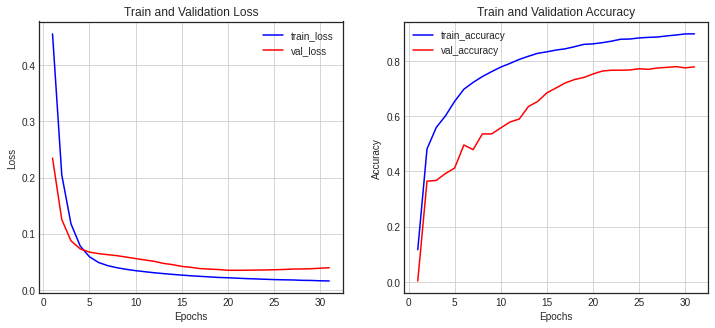

In [25]:
# 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.
plt.style.use('seaborn-white')

history_dict = history2.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

## 모델 평가 및 예측

### 테스트 데이터셋을 이용해 모델을 평가합니다.

In [26]:
# 문제 2-5: 테스트 데이터셋을 이용해 모델을 평가합니다.
model.evaluate(x_test, y_test)

71/71 [==============================] - 0s 2ms/step - loss: 0.0349 - accuracy: 0.7631


[0.034903597086668015, 0.7631344795227051]

# 12-4. CIFAR10 딥러닝 모델

### CIFAR10 데이터셋은 32x32 픽셀의 6,000개 컬러 이미지로 이루어져 있습니다. 데이터셋의 각 이미지는 10개의 클래스로 라벨링되어 있으며, 머신러닝 연구에 가장 널리 사용되고 있습니다.

## 데이터 로드 및 전처리

### CIFAR10 데이터셋을 로드하고, 훈련 데이터셋에서 20%를 검증 데이터셋으로 분리합니다. 데이터셋은 keras.datasets에서 불러올 수 있는 CIFAR10 데이터 셋을 활용합니다.

### 데이터셋 분리 작업에서는 sklearn 라이브러리의 train_test_split 함수를 활용합니다.

### 훈련, 검증, 테스트 데이터와 레이블 종류가 몇개인지 출력합니다.

In [27]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras import utils
from tensorflow.keras import models, layers
from tensorflow.keras.datasets import cifar10

In [44]:
# 문제 3-1: cifar10 데이터셋을 로드하고, 훈련 데이터셋에서 20%를 검증 데이터셋으로 분리합니다.
(X_train_full, Y_train_full), (X_test, Y_test) = cifar10.load_data()

X_train, X_val, Y_train, Y_val = train_test_split(X_train_full, Y_train_full,
                                                  test_size=0.2,
                                                  random_state=123)

# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇개인지 출력합니다.
print("전체 학습 데이터: {} 레이블: {}".format(X_train_full.shape, Y_train_full.shape))
print("학습 데이터: {} 레이블: {}".format(X_train.shape, Y_train.shape))
print("검증 데이터: {} 레이블: {}".format(X_val.shape, Y_val.shape))
print("테스트 데이터: {} 레이블: {}".format(X_test.shape, Y_test.shape))

전체 학습 데이터: (50000, 32, 32, 3) 레이블: (50000, 1)
학습 데이터: (40000, 32, 32, 3) 레이블: (40000, 1)
검증 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)
테스트 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)


### class_name 변수를 만들어 cifar10의 분류에 해당하는 'airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'를 담습니다.

In [45]:
# cifar10의 분류에 해당하는 'airplane', 'automobile', 'bird', 'cat', 'deer', 
# 'dog', 'frog', 'horse', 'ship', 'truck'를 class_name으로 정의합니다.
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

class_names

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

### 데이터 중 샘플 하나를 시각화해보고, 데이터의 형태를 확인해봅니다.

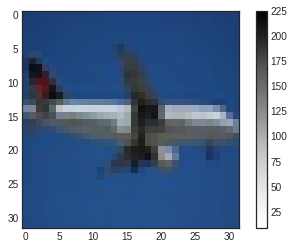

In [46]:
# 훈련 데이터의 0번째인 X_train[0]를 이미지로 시각화합니다.
plt.style.use('seaborn-white')

plt.figure()
plt.imshow(X_train[0])
plt.colorbar()
plt.show()

In [47]:
# 훈련, 검증, 테스트 데이터의 형태(shape)을 출력합니다.
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(40000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 32, 32, 3)


### 데이터의 형태를 변형하여 모델이 잘 학습할 수 있게끔 해줍니다.

In [48]:
# 문제 3-2: 훈련, 검증, 테스트 데이터의 형태(shape)을 32 * 32 * 3 = 3072로 변형합니다.
X_train = X_train.reshape(-1 , 32 * 32 * 3 )
X_val = X_val.reshape(-1, 32 * 32 * 3)
X_test = X_test.reshape(-1, 32 * 32 * 3)

print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(40000, 3072)
(10000, 3072)
(10000, 3072)


In [49]:
# 훈련, 검증, 테스트 데이터를 255로 나누어 0~1 사이의 값으로 변환합니다.
X_train = X_train.astype('float32') / 255.0
X_val = X_val.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.

print(X_train[0])

from tensorflow.keras.utils import to_categorical

Y_train = to_categorical(Y_train, num_classes=10)
Y_val = to_categorical(Y_val, num_classes=10)

[0.09803922 0.23921569 0.4509804  ... 0.1254902  0.28627452 0.5058824 ]


## 모델 구성 및 컴파일

### BatchNormalization과 Dropout을 적용하여 빠르게 학습하면서 과대적합을 방지하고, 10개의 이미지를 분류하는 딥러닝 모델을 구성합니다.

In [50]:
# 문제 3-3: BatchNormalization과 Dropout을 적용하여 빠른 학습과 과대적합을 방지하고,
# 10개의 이미지를 분류하는 딥러닝 모델을 구성합니다.

model = models.Sequential()
model.add(layers.Input(shape=(32*32*3, )))
model.add(layers.Dense(2048, activation='relu'))
model.add(layers.Activation('relu')) 
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))

model.add(layers.Dense(1024, activation='sigmoid'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('sigmoid')) 
model.add(layers.Dropout(0.5))


model.add(layers.Dense(512, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu')) 
model.add(layers.Dropout(0.5))

model.add(layers.Dense(10, activation='softmax'))




model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 2048)              6293504   
_________________________________________________________________
activation_14 (Activation)   (None, 2048)              0         
_________________________________________________________________
batch_normalization_14 (Batc (None, 2048)              8192      
_________________________________________________________________
dropout_14 (Dropout)         (None, 2048)              0         
_________________________________________________________________
dense_23 (Dense)             (None, 1024)              2098176   
_________________________________________________________________
batch_normalization_15 (Batc (None, 1024)              4096      
_________________________________________________________________
activation_15 (Activation)   (None, 1024)             

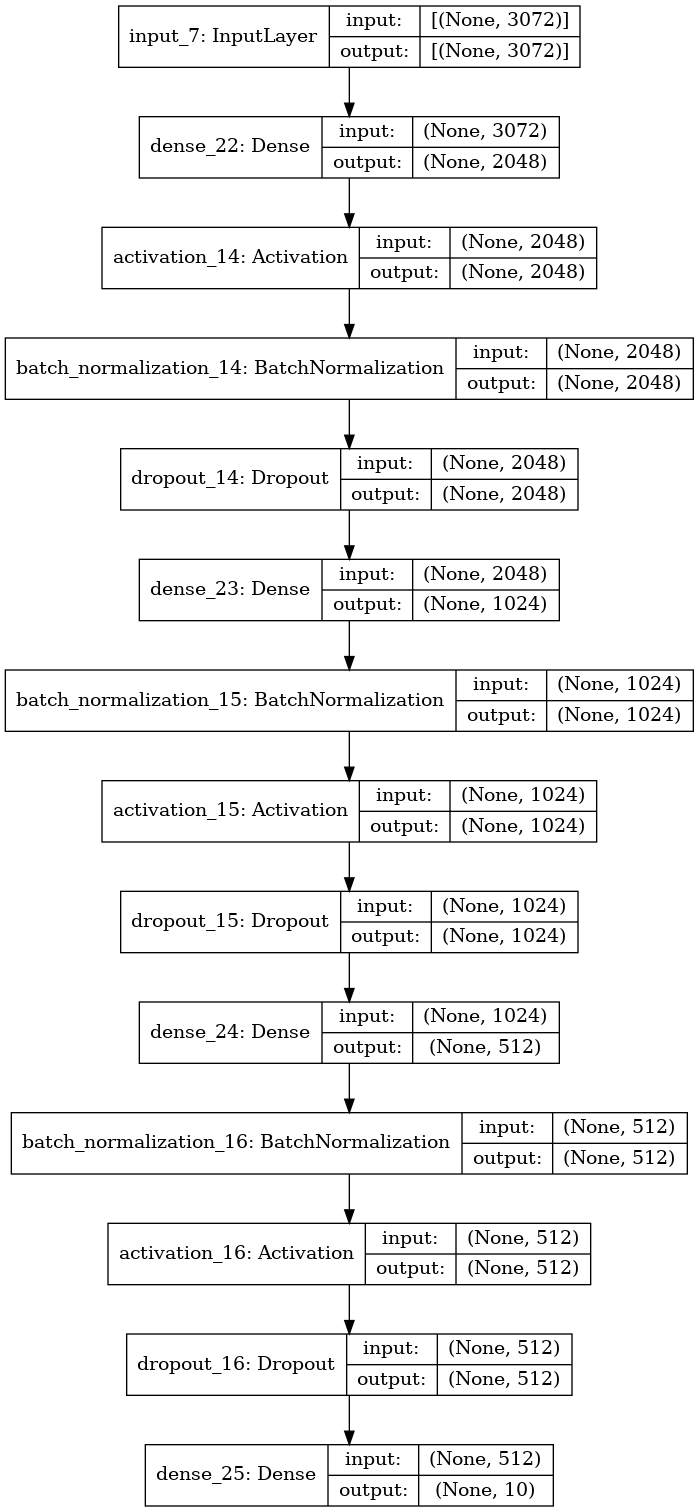

In [51]:
utils.plot_model(model, show_shapes=True)

## 모델 학습

### ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.

In [52]:
# 문제 3-4: ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.

from tensorflow.keras import callbacks

check_point_cb = callbacks.ModelCheckpoint('CIFAR10_model.h5', 
                                           save_best_only=True)
early_stopping_cb = callbacks.EarlyStopping(patience=10, 
                                            monitor='val_loss',
                                            restore_best_weights=True)

history3 = model.fit(X_train, Y_train, 
                     epochs=60,
                     batch_size=512,
                     validation_data=(X_val, Y_val),
                     callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/60
79/79 [==============================] - 2s 18ms/step - loss: 2.3103 - accuracy: 0.2346 - val_loss: 2.3673 - val_accuracy: 0.2013
Epoch 2/60
79/79 [==============================] - 1s 11ms/step - loss: 1.9219 - accuracy: 0.3154 - val_loss: 1.8094 - val_accuracy: 0.3534
Epoch 3/60
79/79 [==============================] - 1s 12ms/step - loss: 1.7979 - accuracy: 0.3538 - val_loss: 1.8188 - val_accuracy: 0.3502
Epoch 4/60
79/79 [==============================] - 1s 11ms/step - loss: 1.7381 - accuracy: 0.3738 - val_loss: 1.7878 - val_accuracy: 0.3534
Epoch 5/60
79/79 [==============================] - 1s 11ms/step - loss: 1.6957 - accuracy: 0.3918 - val_loss: 2.0575 - val_accuracy: 0.2850
Epoch 6/60
79/79 [==============================] - 1s 11ms/step - loss: 1.6667 - accuracy: 0.4046 - val_loss: 1.7972 - val_accuracy: 0.3653
Epoch 7/60
79/79 [==============================] - 1s 11ms/step - loss: 1.6547 - accuracy: 0.4072 - val_loss: 1.9124 - val_accuracy: 0.3250
Epoch 8/60
79

### 학습 히스토리의 loss, val_loss, accuracy, val_accuracy를 차트로 시각화합니다.

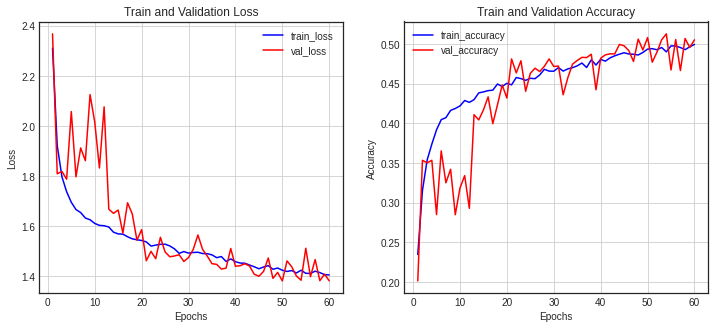

In [54]:
# 문제 3-5: 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.
import matplotlib.pyplot as plt

history_dict = history3.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(loss) + 1)

fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color='blue', label='train_loss')
ax1.plot(epochs, val_loss, color='red', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, color='blue', label='train_accuracy')
ax2.plot(epochs, val_accuracy, color='red', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [55]:
# 테스트 데이터셋을 이용해 모델을 평가합니다.
Y_test = to_categorical(Y_test, num_classes=10)
model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.3688 - accuracy: 0.5132


[1.3688284158706665, 0.5131999850273132]

### 사실 지금까지 배운 Dense Layer만 활용해서는 이번 프로젝트에서 높은 accuracy를 얻기는 힘듭니다. 이미지 데이터를 다루기 위해서는 이미지에 적합한 CNN(Convolution Neural Network) 계열의 모델을 사용해야 합니다. CNN에 대한 내용은 Computer Vision 과정을 통해 더 배울 수 있습니다.